In [5]:
import os
import sys
import pyximport
pyximport.install(reload_support=True)

import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.path.dirname(os.path.realpath(os.path.abspath(''))), "..\\.."))
from unittest.mock import MagicMock
sys.modules['common.realtime']  = MagicMock() #dumy module
sys.modules['opendbc.can.packer']  = MagicMock() #dumy module

from selfdrive.config import Conversions as CV
from selfdrive.car.bmw.values import CAR

from selfdrive.car.bmw.interface import CarInterface
CP = CarInterface.get_params(CAR.E82_DCC)



Controler: pid


5.5625


Text(0, 0.5, 'Torque [Nm]')

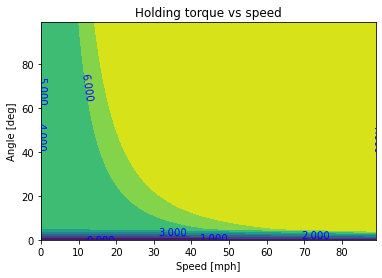

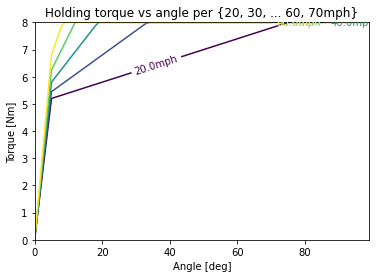

In [34]:
from selfdrive.car.bmw.values import SteerActuatorParams
from selfdrive.car.bmw.carcontroller import calc_steering_center_torque

Calc_steering_center_torque = np.vectorize(calc_steering_center_torque, doc='Vectorized `calc_steering_center_torque`')


speed_bp = np.arange(0, 90) #mph
angle_bp = np.arange(0, 100)


[SPEED, ANGLE]= np.meshgrid(speed_bp, angle_bp)
TORQUE = np.minimum((ANGLE * ((SPEED * CV.MPH_TO_MS) ** 2 * CP.lateralTuning.pid.kf) + SteerActuatorParams.STEER_TORQUE_OFFSET), SteerActuatorParams.MAX_STEERING_TQ)
TORQUE = np.minimum(Calc_steering_center_torque(ANGLE, SPEED * CV.MPH_TO_MS, SteerActuatorParams), SteerActuatorParams.MAX_STEERING_TQ)

print( calc_steering_center_torque(5, 15, SteerActuatorParams))
# %mph-> ms,
# print(TORQUE[:,-1])

# hold on
fig1, torqueAx = plt.subplots()
torqueLevels = torqueAx.contourf(SPEED, ANGLE, TORQUE, levels=np.arange(SteerActuatorParams.MAX_STEERING_TQ+1))
torqueAx.clabel(torqueLevels, colors='b')
plt.title("Holding torque vs speed")
plt.xlabel("Speed [mph]")
plt.ylabel("Angle [deg]")

fig2, SpeedAx = plt.subplots()
speedCountours = SpeedAx.contour(ANGLE, TORQUE, SPEED, levels = np.arange(20, 70, 10), Xlabel="Angle")
SpeedAx.clabel(speedCountours, fmt='%rmph')
plt.title("Holding torque vs angle per {20, 30, ... 60, 70mph}")
plt.xlabel("Angle [deg]")
plt.ylabel("Torque [Nm]")




